In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import scipy.optimize
import sklearn

In [2]:
def ry():
    t = np.random.uniform(0,1)
    y= np.random.binomial(n=3,p=t)
    return y

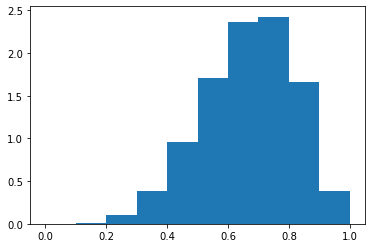

In [21]:
y=5
tsample =np.random.uniform(0,1,size=100000)
w=scipy.stats.binom.pmf(y,n=7,p=tsample)
w=w/np.sum(w)

plt.hist(tsample, weights=w, density=True)
plt.show()

In [22]:
x = [2,3,2.1,2.4,3.14,1.8]
# 1. assume A and B are independent, so we generate lists of (A,B) samples
asample = np.random.exponential(1/0.2, size=10000)
bsample = np.random.exponential(1/0.1, size=10000)

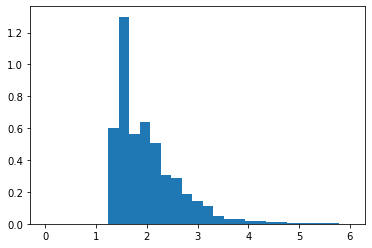

In [25]:

min,max = np.min(x), np.max(x)
w = np.power(1/bsample,len(x)) * np.where(((min >= asample) & (max <= asample + bsample)),1,0)
w = w / np.sum(w)

plt.hist(bsample, weights=w, density=True, bins=np.linspace(0,6,30))
plt.show()

In [26]:
# for each Θ, we generate 10 data pieces as a set
x = np.random.choice((6,7,8,9,10),1000,replace=True, p = [0.1,0.2,0.2,0.3,0.2])

<ipython-input-27-9b3922463391>:6: RuntimeWarning: invalid value encountered in true_divide
  w = w / np.sum(w)


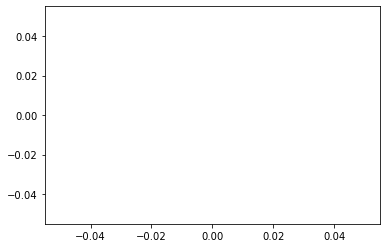

In [27]:
# without using logs
# 1. sample Θ using prior distribution
Θsample = np.random.uniform(0,1,size=10000)
# 2. calculate the weights using observed likelihood wi ∝ PrX(X|Θ), where (X|Θ) ~ Bin(10,Θ)
w = [np.product(scipy.stats.binom.pmf(x,n = 10, p = Θ)) for Θ in Θsample]
w = w / np.sum(w)
# 3. reason about (Θ|X)
plt.hist(Θsample, weights=w, density=True, bins=30)
plt.show()

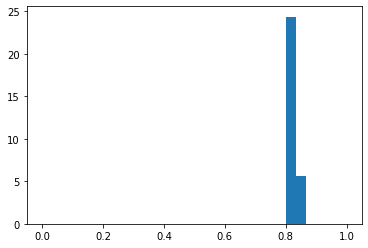

In [28]:
logw = [np.sum(scipy.stats.binom.logpmf(x,n = 10, p = t)) for t in tsample]
maxlogw = np.max(logw)
w=np.exp(logw-maxlogw)
w=w/np.sum(w)
plt.hist(tsample, weights=w, density=True, bins=30)
plt.show()

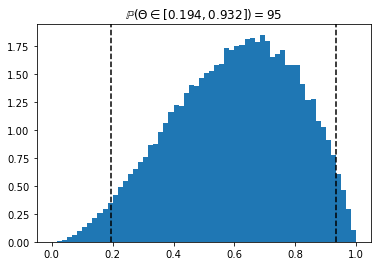

In [29]:
y=2
tsample =np.random.uniform(0,1,size=100000)
w=scipy.stats.binom.pmf(y,n=3,p=tsample)
w=w/np.sum(w)

i =np.argsort(tsample)
tsample, w = tsample[i], w[i]
F = np.cumsum(w)
(lo,hi) = (tsample[F<0.025][-1], tsample[F>0.975][0])

fig,ax =plt.subplots()
ax.hist(tsample,weights=w, density=True, bins=60)
ax.axvline(x=lo, linestyle='--',color='black')
ax.axvline(x=hi, linestyle='--', color='black')
ax.set_title(r'$\mathbb{P}(\Theta\in'+f'[{lo:.3},{hi:.3}]'+')=95%$')
plt.show()